In [3]:
import cv2 as cv
import numpy as np
# 行内显示图片
def cv2_imshow(image):
    return plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

def plt_format(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 弹出窗口展示图片
def window_show(image):
    cv.imshow('image',image)
    cv.waitKey(1000000)
    cv.destroyAllWindows()

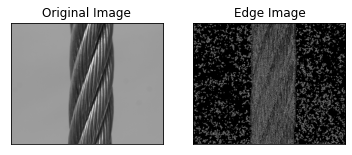

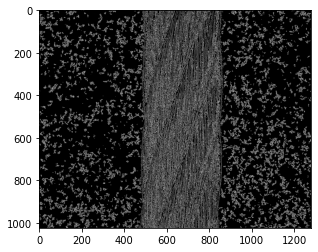

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,1,20)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(edges)

In [38]:
import numpy as np
import cv2 as cv
im = cv.imread('09.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(th2, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL,
cv.CHAIN_APPROX_SIMPLE)

In [ ]:
print(contours)

In [40]:
con = cv.drawContours(th2, contours, -1, (0,255,0), 3)

In [41]:
contours.sort(key=lambda c: cv.contourArea(c), reverse=True)

AttributeError: 'tuple' object has no attribute 'sort'

In [47]:
mask=cv.drawContours(th2,contours,0,255,cv.FILLED)

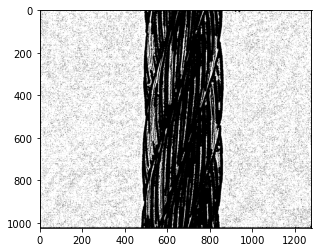

In [48]:
cv2_imshow(mask)

In [ ]:
# 获取极端点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

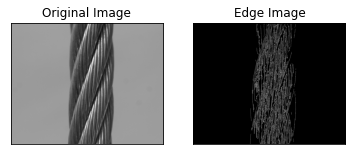

In [26]:
# canny边缘检测
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('09.png',0)
edges = cv.Canny(img,100,20)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
import cv2 as cv
img = cv.imread('09.png',0)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,-2)

In [10]:
img.dtype

dtype('uint8')

In [13]:
window_show(img)

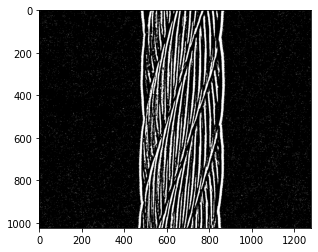

In [7]:
cv2_imshow(th2)

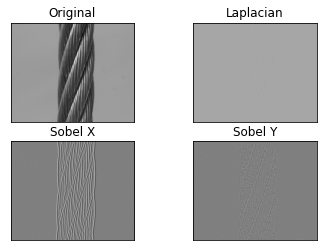

In [94]:

import cv2 as cv
from matplotlib import pyplot as plt
# img = cv.imread('09.png',0)
# laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(th2,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(th2,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()
window_show(sobelx)

第三个参数（255）：超过阈值的部分取值是多少（对于cv.THRESH_BINARY而言）

第四个参数（cv.ADAPTIVE_THRESH_MEAN_C）：
（1）在一个邻域内计算阈值所采用的算法，有两个取值，分别为 ADAPTIVE_THRESH_MEAN_C 和 ADAPTIVE_THRESH_GAUSSIAN_C
（2）ADAPTIVE_THRESH_MEAN_C的计算方法是计算出领域的平均值再减去第七个参数2的值。
（3）ADAPTIVE_THRESH_GAUSSIAN_C的计算方法是计算出领域的高斯均值再减去第七个参数2的值

第五个参数（cv.THRESH_BINARY）：这是阈值类型，只有两个取值，分别为 THRESH_BINARY 和THRESH_BINARY_INV

第六个参数（11）：adaptiveThreshold的计算单位是像素的邻域块大小选择，这是局部邻域大小，3、5、7等

第七个参数（2）：这个参数实际上是一个偏移值调整量，用均值和高斯计算阈值后，再减或加这个值就是最终阈值。

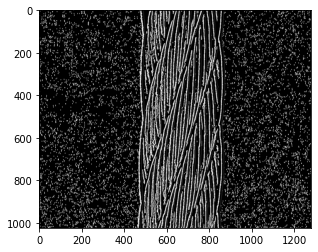

In [11]:
image = np.array(sobelx,np.uint8)
cv2_imshow(image)
# window_show(sobelx)

In [92]:
sobelx.shape

(1024, 1280)

In [ ]:
imgray = cv.cvtColor(sobelx, cv.COLOR_BGR2GRAY)

In [20]:
arr = np.uint8(sobelx)

In [95]:
# cv.RETR_TREE会完整建立轮廓的层级从属关系，[1]代表只获得hierarchy，它是一个包含4个值的数组：[Next, Previous, First Child, Parent]
contours1 = cv.findContours(arr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
# print(contours1)
# 对轮廓的面积降序排列
contours1 = sorted(contours1, key=cv.contourArea, reverse=True)

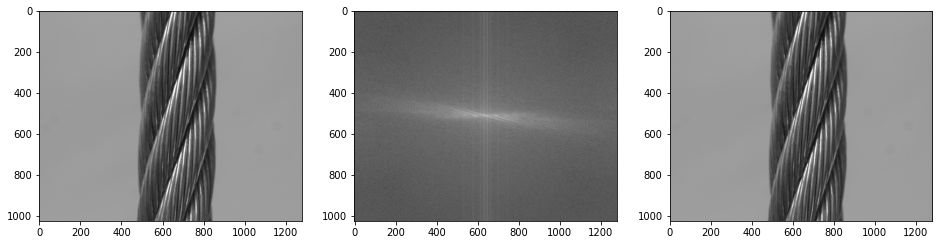

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r'09.png',0)  #img.shape返回(512, 512)

f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)   #傅里叶变换, f是一个float32类型的array数组，f.shape返回(512, 512, 2)
fshift = np.fft.fftshift(f)   #零频率分量向中心移动。 fshift也f数据类型一样，数据结构也一样。  
dst = cv2.magnitude(fshift[:,:,0], fshift[:,:,1])   #计算频谱幅度。dst.shape返回(512, 512)
result = 20*np.log(dst)  #映射到[0,256]
#----------------进行傅里叶逆变换-----------------------------------------
iimg = cv2.idft(f)   #逆变换
dst1 = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])   #计算幅度

#---------------------------分离高低频信号-------------------------------
center_row = int(img.shape[0]/2)      #生成中心点
center_col = int(img.shape[1]/2)

fshift1 = fshift.copy()
fshift1[center_row-30:center_row+30, center_col-30:center_col+30,:]=0   #把中间的区域置为0，生成高频信号频域图
ifshift1 = np.fft.ifftshift(fshift1)
iimg = cv2.idft(ifshift1)
img_inv1 = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])

fshift2 = fshift.copy()   #把四周区域都置为0，生成低频信号频域图
fshift2[0:center_row-30]=0
fshift2[center_row+30:]=0
fshift2[:, 0:center_col-30]=0
fshift2[:, center_col+30:]=0
ifshift2 = np.fft.ifftshift(fshift2)
iimg2 = cv2.idft(ifshift2)
img_inv2 = cv2.magnitude(iimg2[:,:,0], iimg2[:,:,1])

#可视化：
plt.figure(figsize=(16,6))
plt.subplot(131), plt.imshow(img, cmap='gray')    #原图
plt.subplot(132), plt.imshow(result, cmap='gray')   #频域图
plt.subplot(133), plt.imshow(dst1, cmap='gray')  #逆傅里叶变换后的图像
# plt.subplot(232), plt.imshow(img_inv1, cmap='gray')  #高频信号频域图的逆傅里叶变换结果图，都是边缘，都是像素变换较大的区域。比如脸里面、帽子里面、皮肤里面变化较小的区域都过滤掉了。
# plt.subplot(233), plt.imshow(img_inv2, cmap='gray')  #低频信号频域图的逆傅里叶变换结果图，边缘模糊了，都是一些变换较缓的区域。和前面图的情况正好相反。  
plt.show()

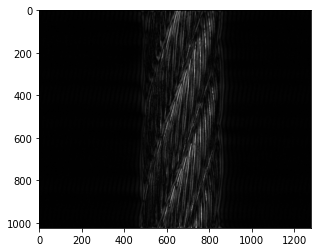

In [120]:
plt.imshow(img_inv1, cmap='gray')  #高频信号频域图的逆傅里叶变换结果图，都是边缘，都是像素变换较大的区域。比如脸里面、帽子里面、皮肤里面变化较小的区域都过滤掉了。


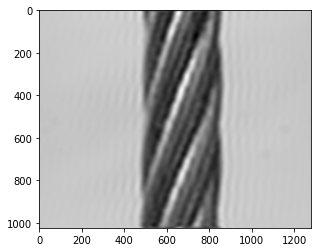

In [121]:
plt.imshow(img_inv2, cmap='gray')

In [107]:
# 遍历所有的轮廓
line = []
mask = np.zeros(img.shape,np.uint8)
for i,error_value in enumerate(contours1):
    if i < 10:
        minArea = cv.minAreaRect(error_value)
        area = cv.contourArea(error_value)
        # cv.imshow('roi2', roi2)
        width = int(minArea[1][1])
        height = int(minArea[1][0])
        print(width,height)
        i = 0
        if height > 1000 and width <50:
            roi2 = cv.drawContours(mask,error_value,-1,(255,0,0),-1)
            i = i+1
            cv.imwrite(f'10{i}.png',roi2)
            
            window_show(roi2)
            
            line.append(error_value)
            break
            # if minArea[1][0] > minArea[1][1]:
            #     width = int(minArea[1][0])
            #     height = int(minArea[1][1])
            # else:
            #     width = int(minArea[1][1])
            #     height = int(minArea[1][0])
            # 判断轮廓的大小是否合适
            
            # print(w2,h2)

362 1027
113 444
56 496
88 390
317 56
29 1023


In [ ]:
mask=cv.drawContours(th2,contours,0,255,cv.FILLED)

In [84]:
hu = line[0]

In [88]:
print(hu[2][0][1])

2


In [ ]:
line2 = []
for i in range(10):
    for j in range(2500):
        print(f"({j},{i})")
        print(hu[j])
        if line[0][j][0][0] == i:
            line2[i] = line[0][j][0][1]

True

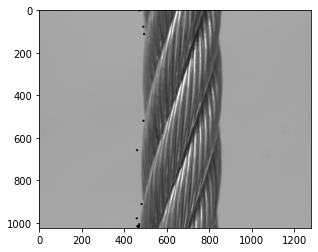

In [98]:
img = cv.imread('09.png',0)
# img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# ret,thresh = cv.threshold(img_gray, 127, 255,0)
# 获取轮廓
# contours,hierarchy = cv.findContours(thresh,2,1)
cnt = line[1]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    # cv.line(img,start,end,[0,255,0],2)
    # cv.circle(img,far,5,[0,0,255],-1)
    cv.circle(img,start,5,[0,0,255],-1)
    # cv.circle(img,end,5,[0,0,255],-1)
cv2_imshow(img)
window_show(img)
cv.imwrite('point.png',img)